# Exercise 1a)

In [35]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import Code.CreateData as cd
import Code.OrdinaryLeastSquares as ols

In [188]:
reload(ols)
reload(cd)

<module 'Code.CreateData' from 'C:\\Users\\emili\\Documents\\Studier\\fys-stk3155\\Exercises\\FYS-STK3155\\Project1\\Code\\CreateData.py'>

First I create the data. I start with no added noise.

In [175]:
#
# Make data and preprocess
#
n = 10000 # number of datapoints 
degree = 5
test_fraction = 0.2
data = cd.CreateData(n,seed=8)
#data.add_normal_noise(0,1)
data.create_design_matrix(degree)
data.split_dataset(test_fraction)
data.scale_dataset()

Now that we have the data scaled and split into training and test sets I use my implementation of OLS to perform the regression.

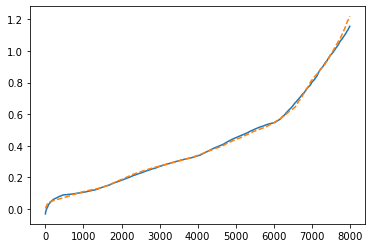

The r^2 score for this fit is: 0.974997412544515


In [168]:
#
# Perform regression
#
OLS_model = ols.OrdinaryLeastSquares()
OLS_model.fit(data.X_train,data.z_train)

z_hat = OLS_model.predict(data.X_train)

# plotting the predicted z-values with the true values
plt.plot(np.sort(z_hat))#data.z_test,OLS_model.z_hat)
plt.plot(np.sort(data.z_train),linestyle='dashed')
plt.show()

print("The r^2 score for this fit is:", OLS_model.r2(z_hat,data.z_train))

I see we get a pretty good fit. 
Now I move on to a more thorough examination of the performance of my OLS model. I do this by examining the $r^2$ score and mean square error for the training and the test set as the model complexity increases. The model complexity is here given by $d$, the polynomial degree.

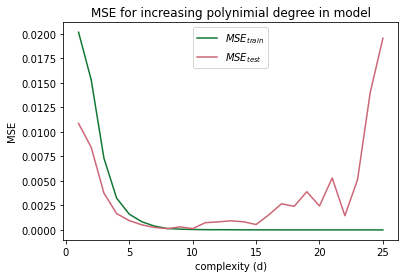

In [220]:
n = 200 # number of datapoints 
max_degree = 25
test_fraction = 0.25
data = cd.CreateData(n,seed=8)
OLS_model = ols.OrdinaryLeastSquares()

r2_scores = np.zeros((max_degree,2))
mses = np.zeros((max_degree,2))

for d in range(max_degree):
    data.create_design_matrix(d+1)
    data.split_dataset(test_fraction)
    data.scale_dataset()
    OLS_model.fit(data.X_train,data.z_train)
    z_hat_train = OLS_model.predict(data.X_train)
    z_hat_test = OLS_model.predict(data.X_test)
    
    r2_scores[d] = ([OLS_model.r2(z_hat_train,data.z_train),OLS_model.r2(z_hat_test,data.z_test)])
    mses[d] = ([OLS_model.mean_square_error(z_hat_train,data.z_train),OLS_model.mean_square_error(z_hat_test,data.z_test)])
    
d = np.arange(1,max_degree+1)
plt.plot(d,mses[:,0], color='#117733', label='$MSE_{train}$')
plt.plot(d,mses[:,1], color='#CC6677', label='$MSE_{test}$')
plt.xlabel('complexity (d)')
plt.ylabel('MSE')
plt.title('MSE for increasing polynimial degree in model')
plt.legend()

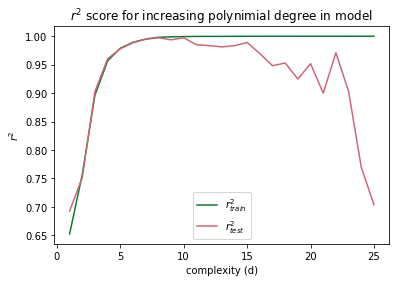

In [221]:
plt.plot(d,r2_scores[:,0], color='#117733', label='$r^2_{train}$')
plt.plot(d,r2_scores[:,1], color='#CC6677', label='$r^2_{test}$')
plt.xlabel('complexity (d)')
plt.ylabel('$r^2$')
plt.title('$r^2$ score for increasing polynimial degree in model')
plt.legend()

Now I want to find the confidence intervals of the $\beta$s.

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression() # OLS
lin_model.fit(data.X_train, data.z_train)
ztilde_skl = lin_model.predict(data.X_test)
print(r2_score(ztilde_skl,data.z_test))

0.9737020577571369


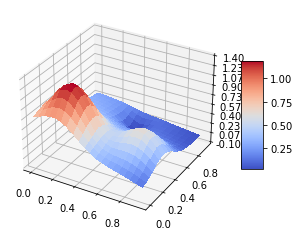

In [128]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    z = term1 + term2 + term3 + term4
    return z #+ np.random.normal(0,1,z.shape)


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [131]:
n=5
x = np.random.rand(n)
y = np.random.rand(n)
x, y = np.meshgrid(x,y)
z = FrankeFunction(x, y)
z_hat = data.calculate_values(x,y)
print(z-z_hat)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
